# Model import

In [298]:
import os
from keras.models import load_model
import numpy as np
from tensorflow import reshape
import tensorflow as tf
import keras.optimizers
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img, img_to_array,ImageDataGenerator
from tensorflow.keras import applications

import random
import re
import html_to_json
from scipy import io
from PIL import Image
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import to_categorical, model_to_dot, plot_model
import glob

In [3]:
os.chdir('../../../Section4/')

In [12]:
type(os.listdir(f'{os.getcwd()}/test'))

list

In [172]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range= 20,
    zoom_range = 0.2,
    horizontal_flip = True,
    vertical_flip = True,
    validation_split = 0.3                                    
)

validation_datagen = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.3                                    
)

train_generator = train_datagen.flow_from_directory(  
    "pics_preprocessed/",
    target_size= (256,256),
    color_mode= 'rgb',
    batch_size= 64,
    class_mode= 'categorical',
    subset='training',   
    shuffle= True, 
    seed= 1
) 

valid_generator = validation_datagen.flow_from_directory(
    "pics_preprocessed/",
    target_size= (256,256),
    color_mode= 'rgb',
    batch_size= 64,
    class_mode= 'categorical',
    subset= 'validation',
    shuffle= True, 
    seed= 1
)

Found 14458 images belonging to 120 classes.
Found 6122 images belonging to 120 classes.


In [147]:
model = load_model('baseline_model_2.h5')
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 6, 6, 2048)        21802784  
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 3, 3, 2048)       0         
 g2D)                                                            
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 120)               245880    
                                                                 
Total params: 22,048,664
Trainable params: 245,880
Non

# Load image

## hide

In [396]:
ls = os.listdir(f'{os.getcwd()}/test')

In [295]:
Image1 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[0]}",target_size=(256,256))
Image2 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[1]}",target_size=(256,256))
Image3 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[2]}",target_size=(256,256))
Image4 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[3]}",target_size=(256,256))
Image5 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[4]}",target_size=(256,256))
Image6 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[5]}",target_size=(256,256))
Image7 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[6]}",target_size=(256,256))
Image8 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[7]}",target_size=(256,256))
Image9 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[8]}",target_size=(256,256))
Image10 = image.load_img(f'{os.getcwd()}/test' + f"/{ls[9]}",target_size=(256,256))

## load

In [433]:
images = [image.load_img(file) for file in glob.glob(f"{os.getcwd()}/test/*.jpg")]

# hide

In [210]:
# most possible predict
np.argmax(image1_img_to_array_stack_predict)

79

In [228]:
# 5 most possible predict
(-image1_img_to_array_stack_predict[0]).argsort()[:4]

array([79,  6, 88, 81], dtype=int64)

n02105855-Shetland_sheepdog : 0.6609981656074524
n02086910-papillon: 0.13190710544586182
n02107683-Bernese_mountain_dog: 0.09967506676912308
n02106166-Border_collie: 0.06337382644414902
n02106030-collie: 0.03016899712383747


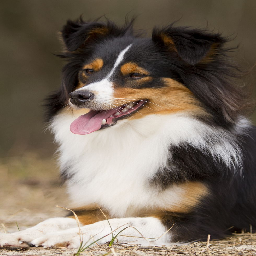

In [236]:
class_dict = train_generator.class_indices
i = (-image1_img_to_array_stack_predict[0]).argsort()[:5]
print(f"{list(class_dict.keys())[list(class_dict.values())[i[0]]]} : {image1_img_to_array_stack_predict[0][list(class_dict.values())[i[0]]]}\n\
{list(class_dict.keys())[list(class_dict.values())[i[1]]]}: {image1_img_to_array_stack_predict[0][i[1]]}\n\
{list(class_dict.keys())[list(class_dict.values())[i[2]]]}: {image1_img_to_array_stack_predict[0][i[2]]}\n\
{list(class_dict.keys())[list(class_dict.values())[i[3]]]}: {image1_img_to_array_stack_predict[0][i[3]]}\n\
{list(class_dict.keys())[list(class_dict.values())[i[4]]]}: {image1_img_to_array_stack_predict[0][i[4]]}")
Image1

# Test

## image_and_prob function

In [330]:
class_dict = train_generator.class_indices

def show_image_and_prob(Image):
    Image = Image.resize((256,256))
    image_img_to_array = image.img_to_array(Image)
    image_img_to_array2 = np.expand_dims(image_img_to_array, axis=0)
    image_img_to_array_stack = np.vstack([image_img_to_array2]) /255
    print(image_img_to_array_stack.shape)
    input = model.predict(image_img_to_array_stack)
    
    i = (-input[0]).argsort()[:5]

    print(f"{list(class_dict.keys())[list(class_dict.values())[i[0]]][10:]}: {input[0][list(class_dict.values())[i[0]]]}\n\
{list(class_dict.keys())[list(class_dict.values())[i[1]]][10:]}: {input[0][i[1]]}\n\
{list(class_dict.keys())[list(class_dict.values())[i[2]]][10:]}: {input[0][i[2]]}\n\
{list(class_dict.keys())[list(class_dict.values())[i[3]]][10:]}: {input[0][i[3]]}\n\
{list(class_dict.keys())[list(class_dict.values())[i[4]]][10:]}: {input[0][i[4]]}")
    return Image

# Test

(1, 256, 256, 3)
1/1 [==============================] - 0s 55ms/step
Samoyed: 0.9486731290817261
malamute: 0.017086150124669075
Great_Pyrenees: 0.013017506338655949
Eskimo_dog: 0.009833679534494877
Siberian_husky: 0.003732305020093918


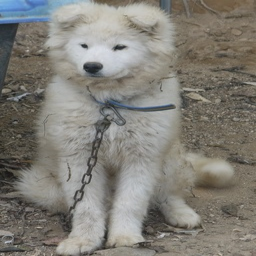

In [435]:
show_image_and_prob(images[7])